In [1]:
import pandas as pd

# 엑셀 파일 경로 설정
file_path = '../raw/4_raw_data.xlsx'

# 첫 번째 시트 읽기 (주제 및 데이터 설명)
data_overview = pd.read_excel(file_path, sheet_name=0)

# 데이터 프레임 출력
print(data_overview.head())

     1           주제                              구조/의장 생산설계 DP 현황 (의장)  \
0  NaN          NaN                                                NaN   
1  2.0  RAW DATA 내용  설계도면들은 각각 DP(Drawing Program) 를 가지고 이를 확인 후 도면...   
2  NaN          NaN                    도면 중 생산설계 DP 관련 일정 및 실적 확인 DATA   
3  NaN          NaN                                                NaN   
4  3.0    Column 설명  (데이터 분석 관점에서 주요 column은 노란색 셀로 표시, 개인 관점에 따라 달...   

  Unnamed: 3  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  


In [2]:
# 엑셀 파일 객체 생성
excel_file = pd.ExcelFile(file_path)

# 모든 시트 이름 가져오기
sheet_names = excel_file.sheet_names

# 첫 번째 시트 제외 (0번 인덱스)
data_sheets = sheet_names[1:]

# 첫 번째 데이터 시트를 읽어 컬럼명 확보
first_sheet = pd.read_excel(file_path, sheet_name=data_sheets[0])
columns = first_sheet.columns

all_data = pd.DataFrame()
for sheet in data_sheets:
    sheet_data = pd.read_excel(file_path, sheet_name=sheet, header=0)
    
    # 컬럼명 통일
    sheet_data.columns = columns
    
    all_data = pd.concat([all_data, sheet_data], ignore_index=True)

# 데이터 프레임 출력
print(all_data.head())
print(all_data.shape)

   No      D/P&BOM 코드 D/P&BOM 내역 설계기능  협력사 직영책임부서  최종 출도가능일자       출도실적
0   1  DPBOM000000001        철의장   F1  NaN     D3 2023-06-19 2023-05-21
1   2  DPBOM000000002        철의장   F1  NaN     D3 2022-08-15 2022-07-21
2   3  DPBOM000000003     의장(설치)   F1  NaN     D3 2022-05-14 2022-04-26
3   4  DPBOM000000004     의장(설치)   F1  NaN     D3 2022-04-15 2022-04-03
4   5  DPBOM000000005         제작   F2  NaN     D4 2023-05-27 2023-05-02
(10339, 8)


In [3]:
# 결측치 확인
missing_values = all_data.isnull().sum()
print("결측치 개수:\n", missing_values)

# 데이터 타입 확인
print("데이터 타입:\n", all_data.dtypes)

# 전체 데이터 통계 요약
print("데이터 요약:\n", all_data.describe(include='all'))

결측치 개수:
 No               0
D/P&BOM 코드       0
D/P&BOM 내역       0
설계기능             0
협력사           8879
직영책임부서           0
최종 출도가능일자        0
출도실적             0
dtype: int64
데이터 타입:
 No                     int64
D/P&BOM 코드            object
D/P&BOM 내역            object
설계기능                  object
협력사                   object
직영책임부서                object
최종 출도가능일자     datetime64[ns]
출도실적          datetime64[ns]
dtype: object
데이터 요약:
                   No      D/P&BOM 코드 D/P&BOM 내역   설계기능   협력사 직영책임부서  \
count   10339.000000           10339      10339  10339  1460  10339   
unique           NaN            7615          7     11     2      7   
top              NaN  DPBOM000002773     의장(설치)     F2    D1     D4   
freq             NaN               3       4965   2665  1459   3059   
mean     1764.176419             NaN        NaN    NaN   NaN    NaN   
min         1.000000             NaN        NaN    NaN   NaN    NaN   
25%       862.000000             NaN        NaN    NaN   NaN    N

In [4]:
data_cleaned = all_data.copy()

if '협력사' in data_cleaned.columns:
    data_cleaned['협력사'].fillna('자체 진행', inplace=True)

# 결측치 처리 후 확인
missing_values_after_cleaning = data_cleaned.isnull().sum()
print("결측치 처리 후 개수:\n", missing_values_after_cleaning)

결측치 처리 후 개수:
 No            0
D/P&BOM 코드    0
D/P&BOM 내역    0
설계기능          0
협력사           0
직영책임부서        0
최종 출도가능일자     0
출도실적          0
dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_1284\1016539651.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['협력사'].fillna('자체 진행', inplace=True)


In [5]:
data_cleaned['최종 출도가능일자'] = pd.to_datetime(data_cleaned['최종 출도가능일자'], errors='coerce')
data_cleaned['출도실적'] = pd.to_datetime(data_cleaned['출도실적'], errors='coerce')

In [11]:
import os

# 폴더 생성
if not os.path.exists('processed_data'):
    os.makedirs('processed_data')

# 전처리된 데이터 저장
data_cleaned.to_csv('processed_data/processed_data_4.csv', index=False)

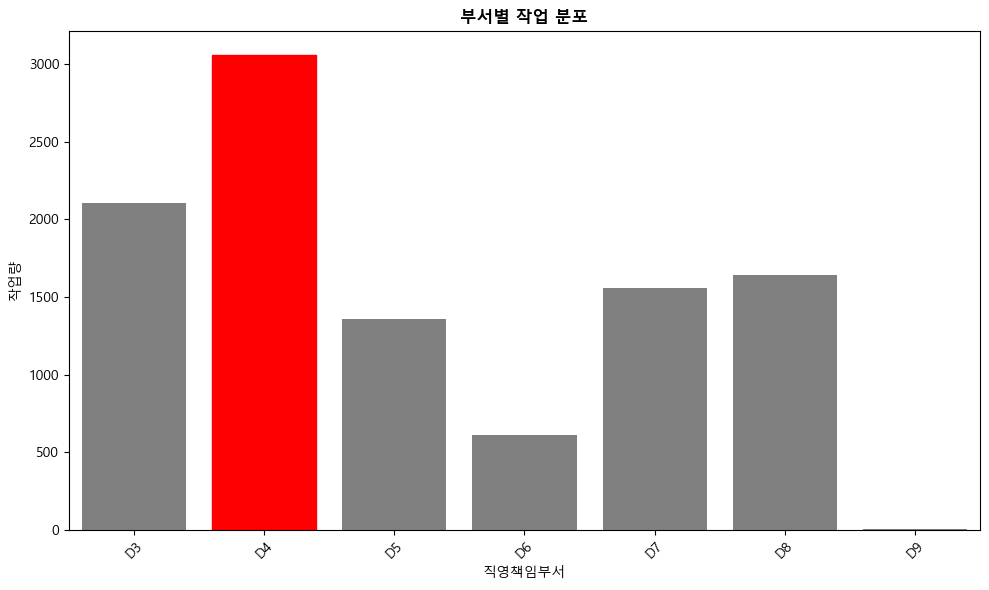

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 부서별 작업량 분석 및 시각화
plt.figure(figsize=(10, 6))
# 기본적으로 회색으로 막대 그래프 생성
ax = sns.countplot(data=data_cleaned, x='직영책임부서', color='grey')
# 각 막대의 높이를 확인하여, 가장 큰 값의 막대만 빨간색으로 변경
max_height = 0
max_rect = None
for rect in ax.patches:
    if rect.get_height() > max_height:
        max_height = rect.get_height()
        max_rect = rect
if max_rect:
    max_rect.set_color('red')  # 가장 큰 값 가지는 막대 빨간색으로 설정
# 그래프 설정
plt.title('부서별 작업 분포', fontweight='bold')
plt.xlabel('직영책임부서')
plt.ylabel('작업량')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

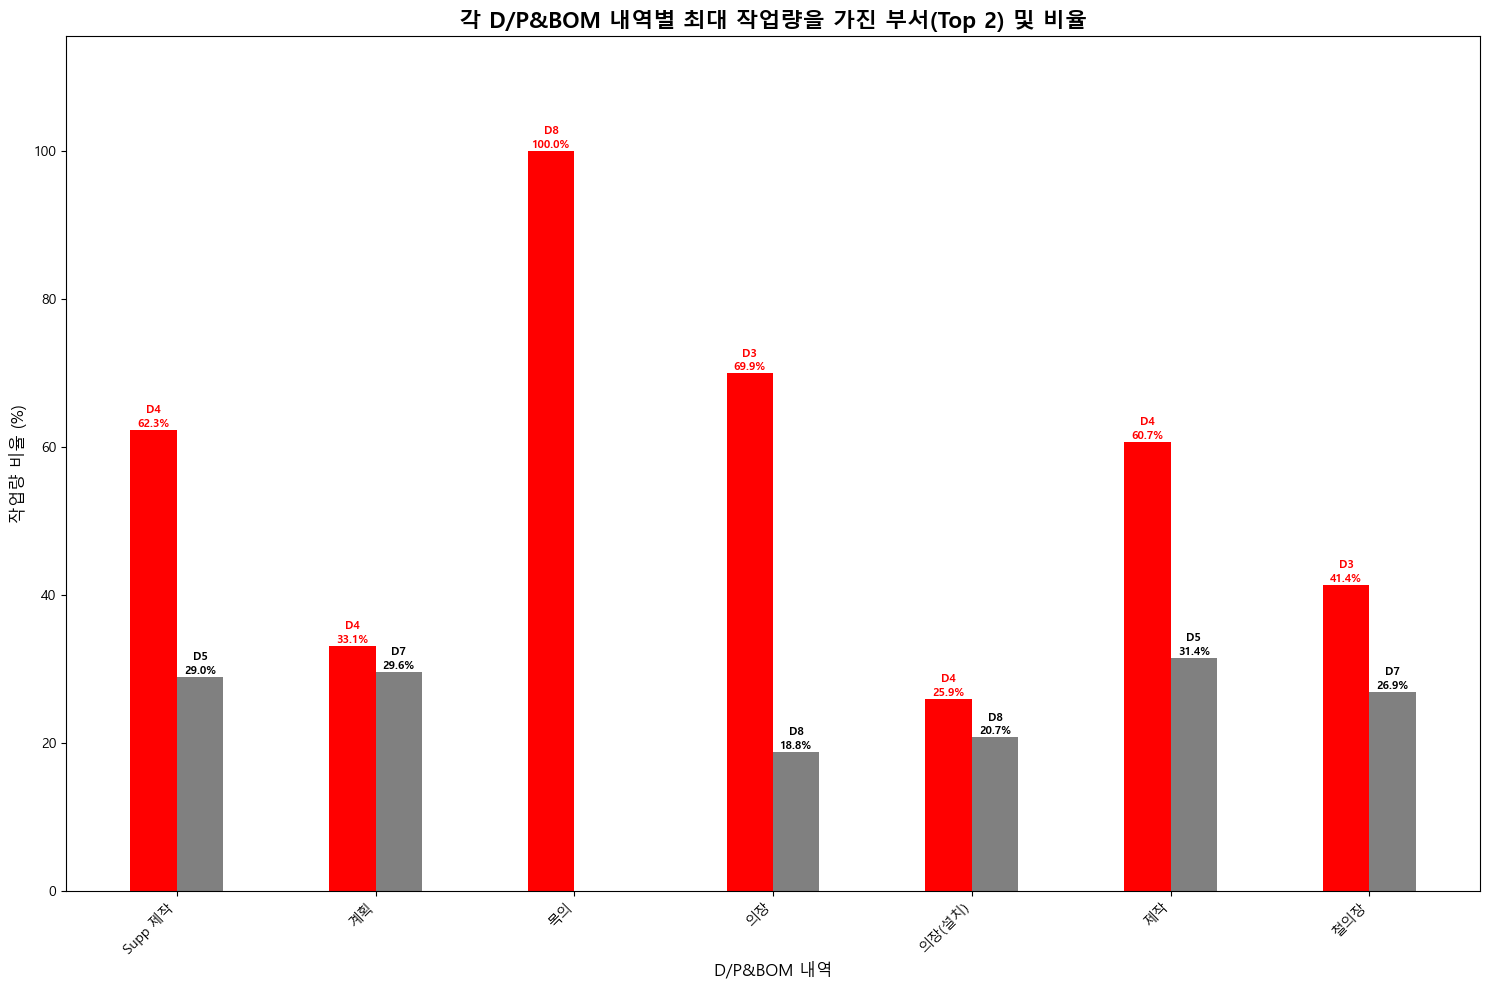

In [7]:
# D/P&BOM 내역별 직영책임부서별 작업량 집계
dp_bom_group = data_cleaned.groupby(['D/P&BOM 내역', '직영책임부서']).size().reset_index(name='작업량')

# 각 D/P&BOM 내역별로 최대 작업량 top 2 부서 추출
top_depts = dp_bom_group.sort_values(['D/P&BOM 내역', '작업량'], ascending=[True, False])
top_depts = top_depts.groupby('D/P&BOM 내역').head(2)

# 전체 작업량 대비 비율 계산
total_work = dp_bom_group.groupby('D/P&BOM 내역')['작업량'].sum().reset_index()
top_depts = top_depts.merge(total_work, on='D/P&BOM 내역', suffixes=('', '_total'))
top_depts['작업량 비율'] = top_depts['작업량'] / top_depts['작업량_total'] * 100

# 시각화
plt.figure(figsize=(15, 10))

x = 0
xticks = []
xlabels = []

for name, group in top_depts.groupby('D/P&BOM 내역'):
    max_percent = group['작업량 비율'].max()
    for i, (_, row) in enumerate(group.iterrows()):
        color = 'red' if row['작업량 비율'] == max_percent else 'grey'
        bar = plt.bar(x + i*0.35, row['작업량 비율'], width=0.35, color=color)
        
        # 레이블 추가
        label_color = 'red' if row['작업량 비율'] == max_percent else 'black'
        plt.text(x + i*0.35, row['작업량 비율'], 
                 f"{row['직영책임부서']}\n{row['작업량 비율']:.1f}%", 
                 ha='center', va='bottom', fontweight='bold', color=label_color,
                 fontsize=8)  # 폰트 크기를 줄여 겹치지 않도록 함
    
    xticks.append(x + 0.35/2)
    xlabels.append(name)
    x += 1.5  # 다음 그룹으로 이동

plt.title('각 D/P&BOM 내역별 최대 작업량을 가진 부서(Top 2) 및 비율', fontsize=16, fontweight='bold')
plt.xlabel('D/P&BOM 내역', fontsize=12)
plt.ylabel('작업량 비율 (%)', fontsize=12)

plt.xticks(xticks, xlabels, rotation=45, ha='right')

# y축 범위 설정 (레이블이 잘리지 않도록)
plt.ylim(0, plt.ylim()[1] * 1.1)  # 최대값의 110%로 설정

plt.tight_layout()
plt.show()

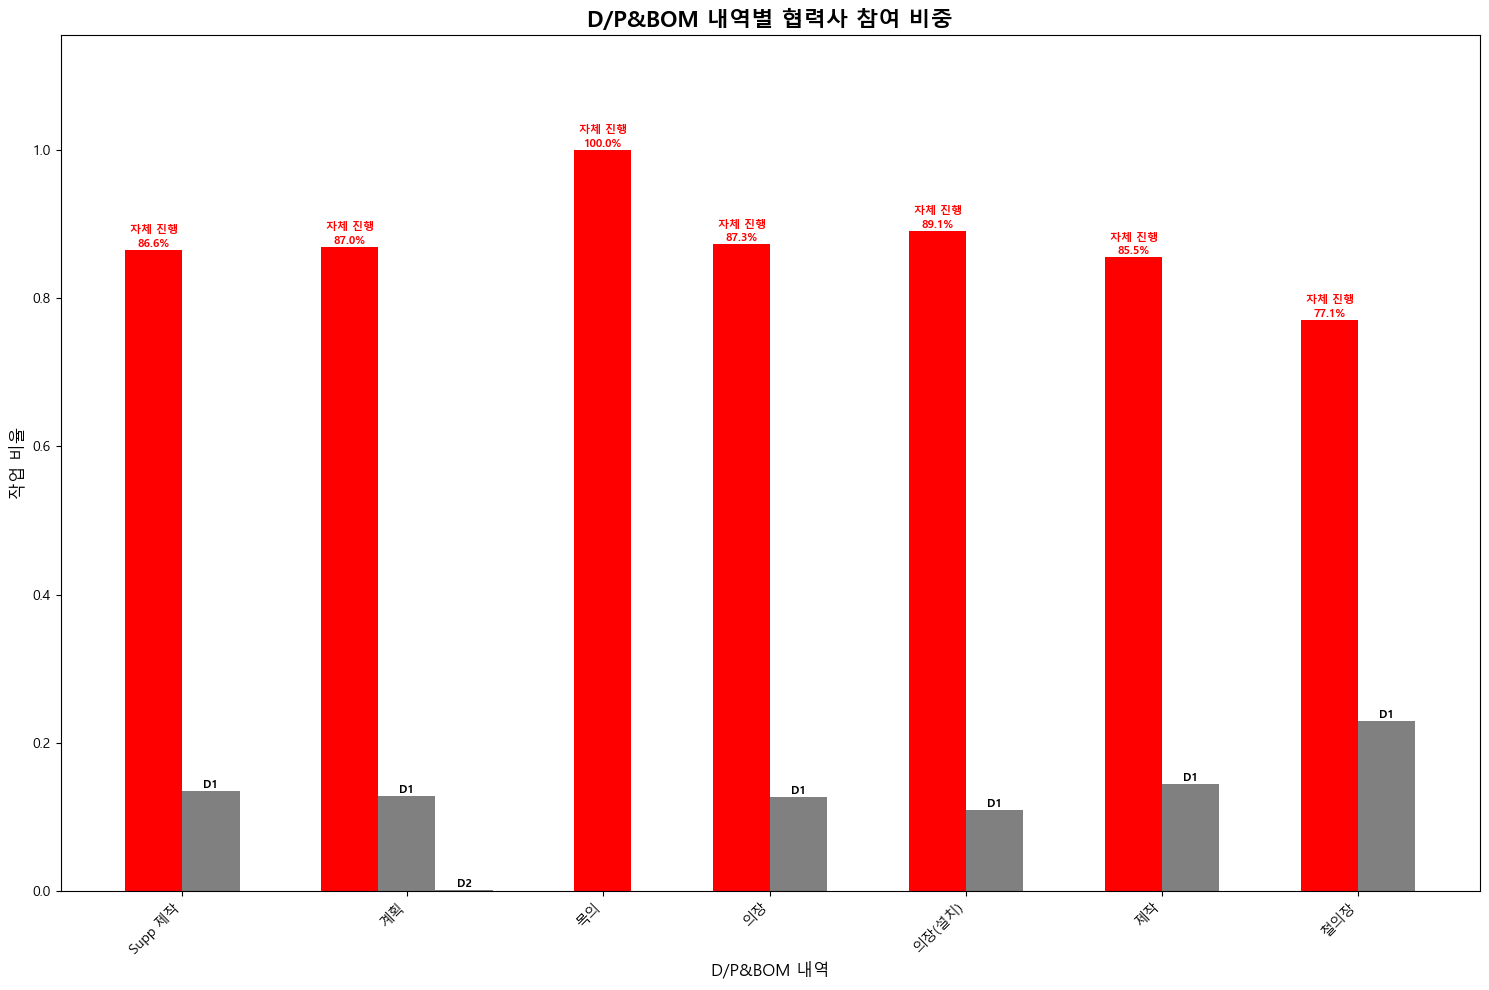

In [8]:
# 데이터 준비
bom_partner_counts = data_cleaned.groupby(['D/P&BOM 내역', '협력사']).size().reset_index(name='작업량')
total_bom_counts = bom_partner_counts.groupby('D/P&BOM 내역')['작업량'].sum().reset_index(name='총 작업량')
bom_partner_counts = bom_partner_counts.merge(total_bom_counts, on='D/P&BOM 내역')
bom_partner_counts['작업 비율'] = bom_partner_counts['작업량'] / bom_partner_counts['총 작업량']

# 시각화
plt.figure(figsize=(15, 10))

x = 0
xticks = []
xlabels = []

for name, group in bom_partner_counts.groupby('D/P&BOM 내역'):
    max_percent = group['작업 비율'].max()
    sorted_group = group.sort_values('작업 비율', ascending=False)
    
    for i, (_, row) in enumerate(sorted_group.iterrows()):
        color = 'red' if row['작업 비율'] == max_percent else 'grey'
        bar = plt.bar(x + i*0.35, row['작업 비율'], width=0.35, color=color)
        
        # 레이블 추가
        if row['작업 비율'] == max_percent:
            label_text = f"{row['협력사']}\n{row['작업 비율']*100:.1f}%"
            label_color = 'red'
        else:
            label_text = f"{row['협력사']}"
            label_color = 'black'
        
        plt.text(x + i*0.35, row['작업 비율'], 
                 label_text, 
                 ha='center', va='bottom', fontweight='bold', color=label_color,
                 fontsize=8)  # 폰트 크기를 줄여 겹치지 않도록 함
    
    xticks.append(x + (len(group)-1)*0.35/2)
    xlabels.append(name)
    x += len(group)*0.35 + 0.5  # 다음 그룹으로 이동

plt.title('D/P&BOM 내역별 협력사 참여 비중', fontsize=16, fontweight='bold')
plt.xlabel('D/P&BOM 내역', fontsize=12)
plt.ylabel('작업 비율', fontsize=12)

plt.xticks(xticks, xlabels, rotation=45, ha='right')

# y축 범위 설정 (레이블이 잘리지 않도록)
plt.ylim(0, plt.ylim()[1] * 1.1)  # 최대값의 110%로 설정

plt.tight_layout()
plt.show()

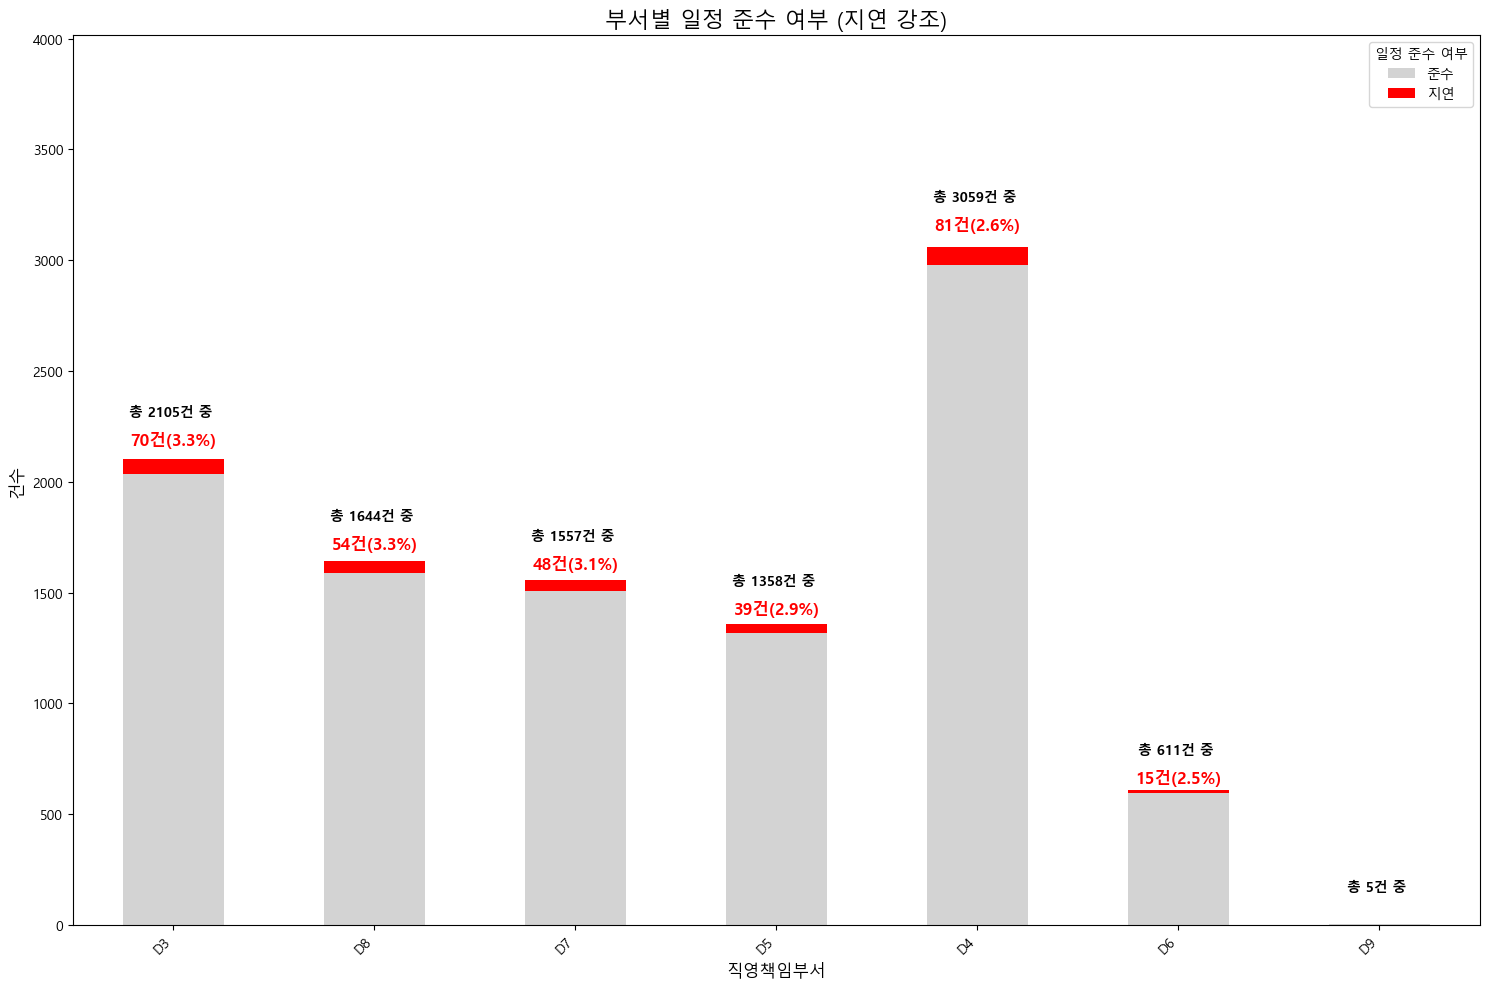

In [9]:
# 일정 차이 계산
data_cleaned['일정 차이'] = (data_cleaned['출도실적'] - data_cleaned['최종 출도가능일자']).dt.days

# 일정 차이 여부에 따른 부서별 데이터 수 계산
data_cleaned['일정 준수 여부'] = data_cleaned['일정 차이'] > 0  # True if late, False if on-time or early
dept_schedule_adherence = data_cleaned.groupby(['직영책임부서', '일정 준수 여부']).size().unstack(fill_value=0)
dept_schedule_adherence.columns = ['준수', '지연']

# 지연 비율 계산
dept_schedule_adherence['지연 비율'] = dept_schedule_adherence['지연'] / (dept_schedule_adherence['준수'] + dept_schedule_adherence['지연'])

# 지연 비율에 따라 정렬
dept_schedule_adherence = dept_schedule_adherence.sort_values('지연 비율', ascending=False)

# 시각화
fig, ax = plt.subplots(figsize=(15, 10))

# 누적 막대 그래프 그리기
bars = dept_schedule_adherence[['준수', '지연']].plot(kind='bar', stacked=True, ax=ax, 
                                                      color=['lightgray', 'red'])

# 값 레이블 표시
for i, (index, row) in enumerate(dept_schedule_adherence.iterrows()):
    total = row['준수'] + row['지연']
    
    # 막대 그래프 상단에서 약간의 간격을 두고 레이블 표시
    y_offset = total * 0.02  # 막대 높이의 2%만큼 위로 이동
    
    ax.text(i, total + y_offset, f"총 {int(total)}건 중 \n\n", 
            ha='center', va='bottom', fontweight='bold', color='black', fontsize=10)
    
    if row['지연'] > 0:
        ax.text(i, total + y_offset, f"\n\n{int(row['지연'])}건({row['지연 비율']:.1%})", 
                ha='center', va='bottom', fontweight='bold', color='red', fontsize=12)

plt.title('부서별 일정 준수 여부 (지연 강조)', fontsize=16)
plt.xlabel('직영책임부서', fontsize=12)
plt.ylabel('건수', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='일정 준수 여부', loc='upper right')

# y축 범위 설정 (레이블이 잘리지 않도록)
plt.ylim(0, plt.ylim()[1] * 1.25)  # 여유 공간을 더 늘림

plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_1284\172551600.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time_series_data = data_cleaned.set_index('출도실적').resample('M').size()
c:\Users\user\.conda\envs\work\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\user\.conda\envs\work\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


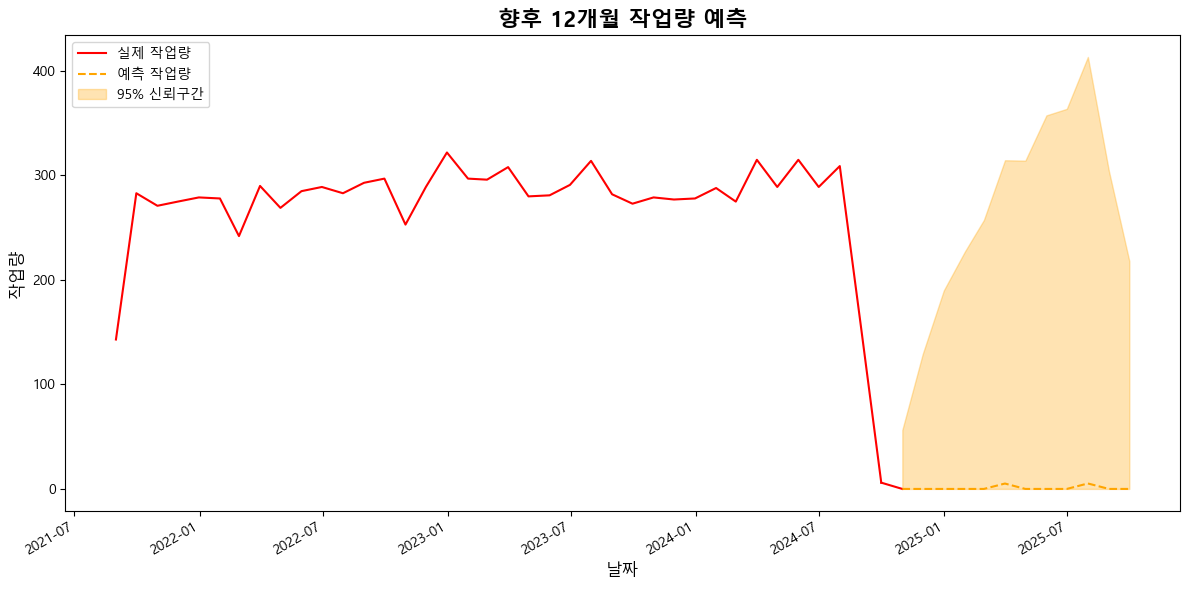


향후 12개월 예측 작업량:
2024-10: 0.00
2024-11: 0.00
2024-12: 0.00
2025-01: 0.00
2025-02: 0.00
2025-03: 5.16
2025-04: 0.00
2025-05: 0.00
2025-06: 0.00
2025-07: 5.23
2025-08: 0.00
2025-09: 0.00


c:\Users\user\.conda\envs\work\Lib\site-packages\statsmodels\tsa\seasonal.py:360: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.tight_layout()
c:\Users\user\.conda\envs\work\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


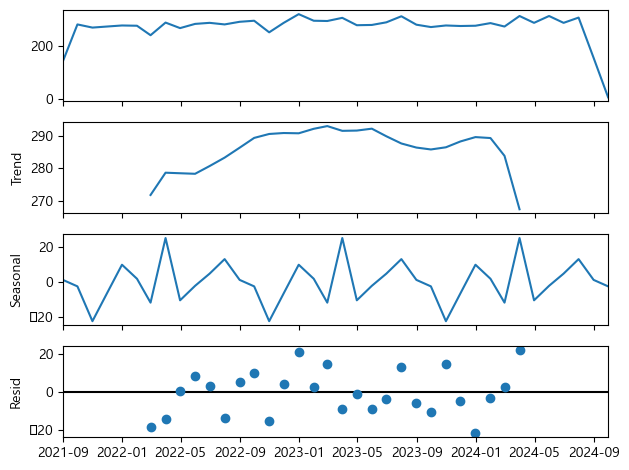

In [10]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd

# 시계열 데이터 준비
time_series_data = data_cleaned.set_index('출도실적').resample('M').size()

# SARIMAX 모델 피팅
model = SARIMAX(time_series_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

# 예측
forecast_periods = 12  # 향후 12개월 예측
forecast = model_fit.get_forecast(steps=forecast_periods)
forecast_mean = forecast.predicted_mean.clip(lower=0)  # 음수값을 0으로 처리
forecast_ci = forecast.conf_int()
forecast_ci[forecast_ci < 0] = 0  # 음수 신뢰구간 값을 0으로 처리

# 실제 데이터의 마지막 값과 예측 데이터의 첫 번째 값을 연결
connection_point = pd.Series([time_series_data.iloc[-1], forecast_mean.iloc[0]], 
                             index=[time_series_data.index[-1], forecast_mean.index[0]])

# 시각화
plt.figure(figsize=(12, 6))

# 실제 데이터
plt.plot(time_series_data.index, time_series_data.values, color='red', label='실제 작업량')

# 실제 데이터의 마지막과 예측 데이터의 첫 번째 점을 연결
plt.plot(connection_point.index, connection_point.values, color='red')

# 예측 데이터
plt.plot(forecast_mean.index, forecast_mean.values, color='orange', linestyle='--', label='예측 작업량')

# 신뢰 구간
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='orange', alpha=0.3, label='95% 신뢰구간')

plt.title('향후 12개월 작업량 예측', fontsize=16, fontweight='bold')
plt.xlabel('날짜', fontsize=12)
plt.ylabel('작업량', fontsize=12)
plt.legend(fontsize=10)

# x축 날짜 포맷 설정
plt.gcf().autofmt_xdate()

plt.tight_layout()
plt.show()

# 예측 결과 출력
print("\n향후 12개월 예측 작업량:")
for date, value in zip(forecast_mean.index, forecast_mean.values):
    print(f"{date.strftime('%Y-%m')}: {value:.2f}")

# 시계열 분해 (별도의 그래프로 표시)
decomposition = seasonal_decompose(time_series_data, model='additive', period=12)
decomposition.plot()
plt.tight_layout()
plt.show()

In [11]:
'''
- 위 4개의 그래프는 시계열 분해(Time Series Decomposition) 그래프입니다.
- 시계열 데이터를 트렌드, 계절성, 그리고 잔차(residuals)로 나누어 시각화한 것입니다.

1. Observed (첫 번째 패널)
> 이 패널은 전체 시계열 데이터의 원래 관측된 값들을 보여줍니다. 데이터의 전반적인 흐름과 주요 변화를 볼 수 있습니다. 그래프의 x축은 시간(날짜)을, y축은 작업량을 나타냅니다.
2. Trend (두 번째 패널)
> 이 패널은 시계열 데이터의 장기적인 경향을 보여줍니다. 데이터의 전반적인 방향성(증가 또는 감소)을 파악할 수 있습니다. 예를 들어, 그래프에서 2022년에 트렌드가 상승하는 패턴이 보이며, 이후 감소하는 경향을 보입니다. 이는 해당 시기에 작업량이 증가했다가 다시 줄어드는 추세를 나타냅니다.
3. Seasonal (세 번째 패널)
> 이 패널은 계절성 요소를 보여줍니다. 계절성은 정기적으로 반복되는 패턴으로, 예를 들어 월별 또는 분기별로 발생하는 주기적 변동을 나타냅니다. 이 패널에서는 특정 기간마다 반복되는 변동 패턴을 확인할 수 있습니다.
4. Residual (네 번째 패널)
> 이 패널은 트렌드와 계절성을 제거한 후 남은 변동을 보여줍니다. 이 잔차는 주기적인 패턴이나 명확한 추세가 없는 랜덤 변동을 나타냅니다. 잔차는 모델이 설명하지 못하는 부분이며, 이 부분을 분석함으로써 모델의 성능을 평가할 수 있습니다. 만약 잔차가 랜덤하게 분포되어 있다면, 모델이 데이터를 잘 설명하고 있는 것입니다.

'''

'\n- 위 4개의 그래프는 시계열 분해(Time Series Decomposition) 그래프입니다.\n- 시계열 데이터를 트렌드, 계절성, 그리고 잔차(residuals)로 나누어 시각화한 것입니다.\n\n1. Observed (첫 번째 패널)\n> 이 패널은 전체 시계열 데이터의 원래 관측된 값들을 보여줍니다. 데이터의 전반적인 흐름과 주요 변화를 볼 수 있습니다. 그래프의 x축은 시간(날짜)을, y축은 작업량을 나타냅니다.\n2. Trend (두 번째 패널)\n> 이 패널은 시계열 데이터의 장기적인 경향을 보여줍니다. 데이터의 전반적인 방향성(증가 또는 감소)을 파악할 수 있습니다. 예를 들어, 그래프에서 2022년에 트렌드가 상승하는 패턴이 보이며, 이후 감소하는 경향을 보입니다. 이는 해당 시기에 작업량이 증가했다가 다시 줄어드는 추세를 나타냅니다.\n3. Seasonal (세 번째 패널)\n> 이 패널은 계절성 요소를 보여줍니다. 계절성은 정기적으로 반복되는 패턴으로, 예를 들어 월별 또는 분기별로 발생하는 주기적 변동을 나타냅니다. 이 패널에서는 특정 기간마다 반복되는 변동 패턴을 확인할 수 있습니다.\n4. Residual (네 번째 패널)\n> 이 패널은 트렌드와 계절성을 제거한 후 남은 변동을 보여줍니다. 이 잔차는 주기적인 패턴이나 명확한 추세가 없는 랜덤 변동을 나타냅니다. 잔차는 모델이 설명하지 못하는 부분이며, 이 부분을 분석함으로써 모델의 성능을 평가할 수 있습니다. 만약 잔차가 랜덤하게 분포되어 있다면, 모델이 데이터를 잘 설명하고 있는 것입니다.\n\n'